In [23]:
import numpy as np, glob, pickle, matplotlib.pyplot as plt, matplotlib as mpl
from qtool.utility import plot_pulse, NLI

# plt.style.use('seaborn-white')
# plt.style.use('default')
plt.rc('font',**{'family':'serif','serif':['Helvetica'],'size':18})
plt.rc('text', usetex=True)

def get_variation_data(run,episode,variation,test_param,pulse=False,suffix=''):
    if pulse:
        file = glob.glob(f'../data/*{run}*{episode}*variation{variation}_{test_param}*.pkl')
        print(f'../data/*{run}*{episode}*variation{variation}_{test_param}.pkl')
    else:
        file = glob.glob(f'../data/ray_results/*{run}*/RLGen{suffix}_variation{variation}_{test_param}*{episode}.pkl')
    if len(file) != 1:
        print(file)
    data = pickle.load(open(file[0], 'rb'))
    return data

# get_variation_data(9241,11800,variation,param)

In [38]:
arr = [1,2,3,4,4,4,4,4,5,5,6,6,7,8,8,9,10,10,10,10]
imin = 0
imax = len(a) - 1

In [51]:
arr[:13]

[1, 2, 3, 4, 4, 4, 4, 4, 5, 5, 6, 6, 7]

In [52]:
arr[13:]

[8, 8, 9, 10, 10, 10, 10]

In [39]:
while imin != imax:
    i = (imin+imax)//2
    if sum(arr[i:]) > sum(arr[:i]):
        if sum(arr[i+1:]) > sum(arr[:i+1]):
            imin = i+1
        else:
            imin = imax = i
    else:
        imax = i-1
    print(imin,imax)

10 19
10 13
12 13
13 13


In [53]:
(49715+49714)//2

49714

In [59]:
s = [[4, 9, 2], [3, 5, 7], [8, 1, 5]]
max(set(s), key=s.count)

TypeError: unhashable type: 'list'

In [61]:
a = [1,2,3]
b = {0:a[0]}
a[0] = 3
b[0]

/*
Enter your query below.
Please append a semicolon ";" at the end of the query
*/

SELECT a.mac, COUNT(*) AS salts
FROM encryptions e
JOIN  accounts a ON e.account_id = a.id
WHERE CHAR_LENGTH(e.salt) < 8 AND e.is_active = 1
GROUP BY a.mac
ORDER BY a.mac ASC;

1

# Generalization
## Combined

../data/*IBM_CNOT_direct*1120*variation0.07_detune0.pkl
../data/*IBM_CNOT_direct*1120*variation0.07_anharm.pkl
../data/*IBM_CNOT_direct*1120*variation0.07_coupling.pkl
../data/*IBM_CNOT_direct*1120*variation0.07_drive.pkl
['../data/IBM_CNOT_direct_1120dt_variation0.07_drive.pkl', '../data/IBM_CNOT_direct_1120dt_variation0.07_drive_detune0_anharm_coupling.pkl']
../data/*IBM_CNOT_direct*1120*variation0.07_drive_detune0_anharm_coupling.pkl
../data/*3280*5200*variation0.07_detune0.pkl
../data/*3280*5200*variation0.07_anharm.pkl
../data/*3280*5200*variation0.07_coupling.pkl
../data/*3280*5200*variation0.07_drive.pkl
['../data/CNOT_3280_5200_pulse_variation0.07_drive.pkl', '../data/CNOT_3280_5200_pulse_variation0.07_drive_detune0_anharm_coupling.pkl']
../data/*3280*5200*variation0.07_drive_detune0_anharm_coupling.pkl


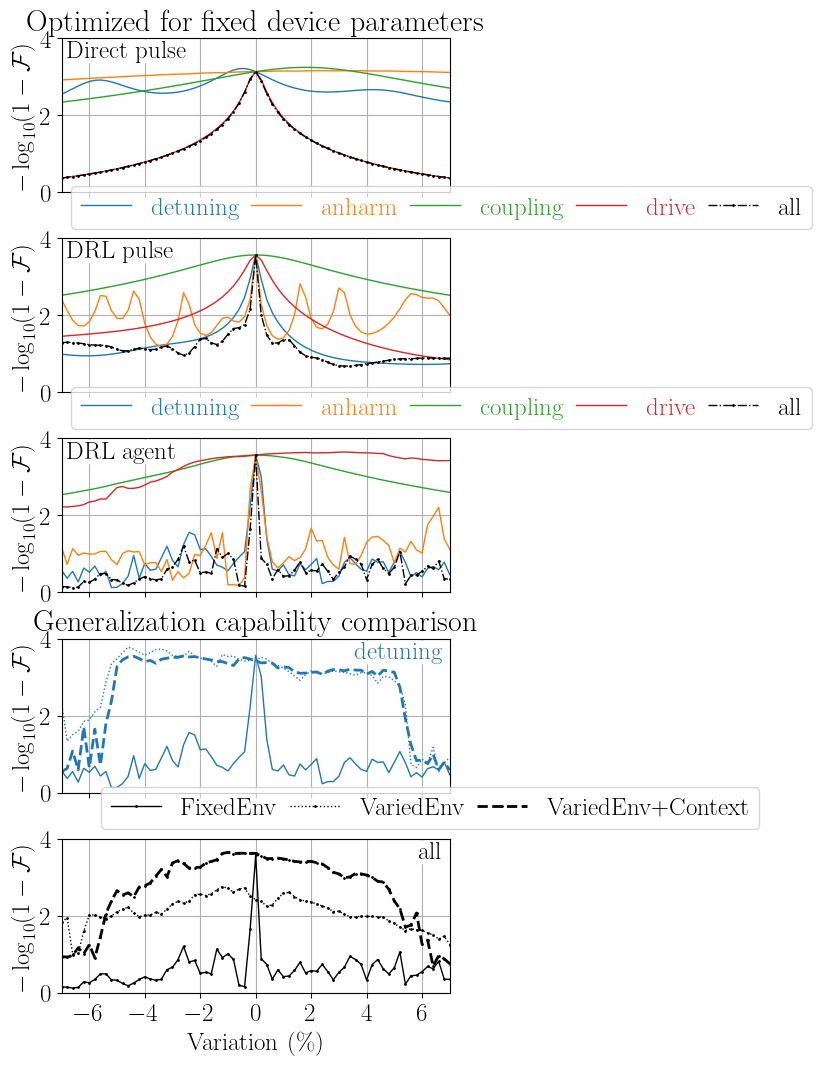

In [82]:
# plt.style.use('seaborn-darkgrid')
# plt.style.use('seaborn-white')

fig, axs = plt.subplots(5,1,figsize=(7,11),sharex=True)
#############################
#### All param variation ####
#############################
datas1 = [
    get_variation_data('IBM_CNOT_direct',1120,0.07,'detune0',pulse=True),
    get_variation_data('IBM_CNOT_direct',1120,0.07,'anharm',pulse=True),
    get_variation_data('IBM_CNOT_direct',1120,0.07,'coupling',pulse=True),
    get_variation_data('IBM_CNOT_direct',1120,0.07,'drive',pulse=True),
    get_variation_data('IBM_CNOT_direct',1120,0.07,'drive_detune0_anharm_coupling',pulse=True),
]
datas2 = [
    get_variation_data(3280,5200,0.07,'detune0',pulse=True),
    get_variation_data(3280,5200,0.07,'anharm',pulse=True),
    get_variation_data(3280,5200,0.07,'coupling',pulse=True),
    get_variation_data(3280,5200,0.07,'drive',pulse=True),
    get_variation_data(3280,5200,0.07,'drive_detune0_anharm_coupling',pulse=True),
]
datas3 = [
    get_variation_data(3280,5200,0.07,'detune0'),
    get_variation_data(3280,5200,0.07,'anharm'),
    get_variation_data(3280,5200,0.07,'coupling'),
    get_variation_data(3280,5200,0.07,'drive_avg'),
    get_variation_data(3280,5200,0.07,'drive_detune_anharm_coupling'),
]

labels = ['detuning','anharm','coupling','drive','all']
ls = ['']*4 + ['o-.']
cs = ['C0','C1','C2','C3','k']
lws = [1]*5
# titles = ['Generalization of optimized pulses','','Generalization of agent']
titles = ['Optimized for fixed device parameters','','']
texts = ['Direct pulse','DRL pulse','DRL agent']
for j,datas in enumerate([datas1,datas2,datas3]):
    for i,data in enumerate(datas):
        axs[j].plot(data['variations']*100,NLI(data['avg_fids']),f'{ls[i]}',color=cs[i],
                    label=labels[i],markersize=1,linewidth=lws[i])
    axs[j].set_title(titles[j])
    axs[j].text(-6.8,3.5, texts[j], color='black', horizontalalignment='left',
            bbox=dict(facecolor='white', edgecolor='white', boxstyle='square,pad=0'))

for i in range(2):
    axs[i+1].legend(bbox_to_anchor=(-0.008,0.98), loc='lower left',
                  ncol=5,columnspacing=0.5,labelcolor='linecolor')
######################################
### LAST TWO PLOTS, GENERALIZED RL ###
######################################

variation = 0.07

param = 'detune0'
datas1 = [
    get_variation_data(3280,5200,variation,param),
    get_variation_data(4658,19400,variation,param),
    # get_variation_data(5360,15200,variation,param),
    # get_variation_data(4658,11800,0.05,'detune0'), # less ep without context
    get_variation_data(9241,11800,variation,param), # unnormalized context
]

param = 'drive_detune_anharm_coupling'
datas2 = [
    get_variation_data(3280,5200,variation,param),
    get_variation_data(1891,400,variation,param),
    get_variation_data(3723,10200,variation,param),
]
titles = ['detuning','all']
cs = ['C0','k']
all_ls  = [['-',':','--'],['o-','o:','o--']]

# textlocs = [[4.5,3.5],[3.5,3.5]]
for j,datas in enumerate([datas1,datas2]):
    
    labels = ['FixedEnv','VariedEnv','VariedEnv+Context']
    # ls  = ['-',':','--']
    ls = all_ls[j]
    alphas = [1,1,1]
    lws = [1,1,2]
    # axs[j].hlines(3,-7,7,'k',linewidth=1.5)
    for i,data in enumerate(datas):
        axs[j+3].plot(data['variations']*100,NLI(data['avg_fids']),
                    f'{ls[i]}',color=cs[j],label=labels[i], markersize=1,alpha=alphas[i],linewidth=lws[i])
    # axs[j].set_title(titles[j])
    axs[j+3].text(6.7,3.5, titles[j], color=cs[j], horizontalalignment='right',
                bbox=dict(facecolor='white', edgecolor='white', boxstyle='square,pad=0'))
    axs[j+3].set_xticks(np.arange(-6,7,2))

axs[-1].set_xlabel('Variation (\%)')
axs[-1].set_xlim(-7,7)
axs[-1].legend(bbox_to_anchor=(0.07,0.98), loc='lower left',ncol=3,columnspacing=0.5)
axs[3].set_title('Generalization capability comparison')

# fig.legend(loc='outside upper center')
for ax in axs:
    ax.set_ylabel('$-\log_{10}(1-\\mathcal{F})$')
    ax.set_ylim(0,4)
    # ax.legend(bbox_to_anchor=(1, 1))
    # ax.legend()
    ax.grid()
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0.3)
# plt.savefig('figs/generalization.pdf',format='pdf')

In [85]:
datas2[2]['avg_fids']

array([0.88538991, 0.88128122, 0.89228053, 0.93239455, 0.90282833,
       0.94363532, 0.87592521, 0.96438353, 0.99113663, 0.99589438,
       0.99777805, 0.99710701, 0.99746117, 0.99678001, 0.99820357,
       0.99833362, 0.99860197, 0.99906704, 0.99937198, 0.9990338 ,
       0.99957463, 0.99963035, 0.99956204, 0.99941949, 0.99944076,
       0.99944963, 0.99957046, 0.99961147, 0.99964869, 0.99975922,
       0.99977453, 0.99975361, 0.99976207, 0.9997624 , 0.99975921,
       0.99975986, 0.99972102, 0.99967207, 0.99967367, 0.99968289,
       0.99966603, 0.99964575, 0.99961386, 0.99959903, 0.99960605,
       0.99961321, 0.99958077, 0.99954941, 0.99943768, 0.99925236,
       0.99918243, 0.99896541, 0.99902053, 0.99919549, 0.9991842 ,
       0.99912197, 0.99899198, 0.99872283, 0.99866924, 0.99794295,
       0.99587824, 0.99337549, 0.98036664, 0.98254242, 0.99150224,
       0.94466067, 0.95703901, 0.79600396, 0.89138413, 0.86759541,
       0.82443314])

## Separate

../data/*IBM_CNOT_direct*1120*variation0.07_detune0.pkl
../data/*IBM_CNOT_direct*1120*variation0.07_anharm.pkl
../data/*IBM_CNOT_direct*1120*variation0.07_coupling.pkl
../data/*IBM_CNOT_direct*1120*variation0.07_drive.pkl
['../data/IBM_CNOT_direct_1120dt_variation0.07_drive.pkl', '../data/IBM_CNOT_direct_1120dt_variation0.07_drive_detune0_anharm_coupling.pkl']
../data/*IBM_CNOT_direct*1120*variation0.07_drive_detune0_anharm_coupling.pkl
../data/*3280*5200*variation0.07_detune0.pkl
../data/*3280*5200*variation0.07_anharm.pkl
../data/*3280*5200*variation0.07_coupling.pkl
../data/*3280*5200*variation0.07_drive.pkl
['../data/CNOT_3280_5200_pulse_variation0.07_drive.pkl', '../data/CNOT_3280_5200_pulse_variation0.07_drive_detune0_anharm_coupling.pkl']
../data/*3280*5200*variation0.07_drive_detune0_anharm_coupling.pkl


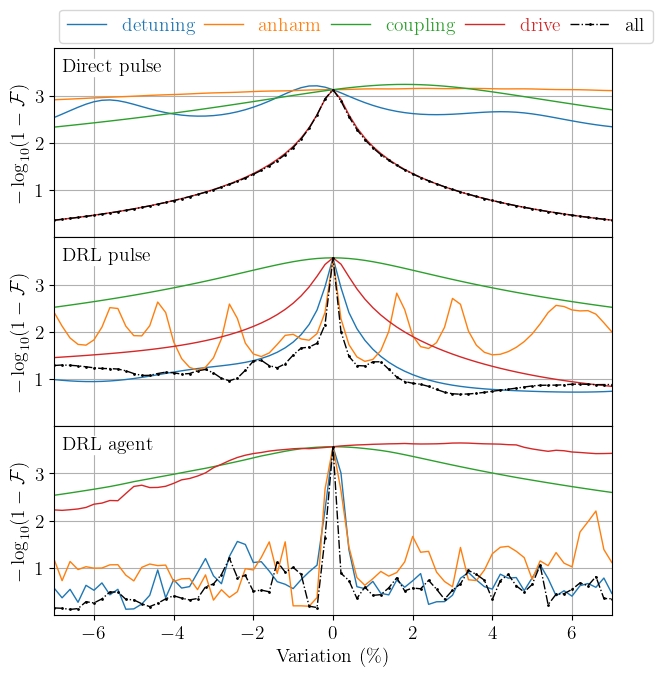

In [275]:
fig, axs = plt.subplots(3,1,figsize=(7,7),sharex=True)
#############################
#### All param variation ####
#############################
datas1 = [
    get_variation_data('IBM_CNOT_direct',1120,0.07,'detune0',pulse=True),
    get_variation_data('IBM_CNOT_direct',1120,0.07,'anharm',pulse=True),
    get_variation_data('IBM_CNOT_direct',1120,0.07,'coupling',pulse=True),
    get_variation_data('IBM_CNOT_direct',1120,0.07,'drive',pulse=True),
    get_variation_data('IBM_CNOT_direct',1120,0.07,'drive_detune0_anharm_coupling',pulse=True),
]
datas2 = [
    get_variation_data(3280,5200,0.07,'detune0',pulse=True),
    get_variation_data(3280,5200,0.07,'anharm',pulse=True),
    get_variation_data(3280,5200,0.07,'coupling',pulse=True),
    get_variation_data(3280,5200,0.07,'drive',pulse=True),
    get_variation_data(3280,5200,0.07,'drive_detune0_anharm_coupling',pulse=True),
]
datas3 = [
    get_variation_data(3280,5200,0.07,'detune0'),
    get_variation_data(3280,5200,0.07,'anharm'),
    get_variation_data(3280,5200,0.07,'coupling'),
    get_variation_data(3280,5200,0.07,'drive_avg'),
    get_variation_data(3280,5200,0.07,'drive_detune_anharm_coupling'),
]

labels = ['detuning','anharm','coupling','drive','all']
ls = ['']*4 + ['o-.']
cs = ['C0','C1','C2','C3','k']
lws = [1]*5
texts = ['Direct pulse','DRL pulse','DRL agent']
for j,datas in enumerate([datas1,datas2,datas3]):
    for i,data in enumerate(datas):
        axs[j].plot(data['variations']*100,NLI(data['avg_fids']),f'{ls[i]}',color=cs[i],
                    label=labels[i],markersize=1,linewidth=lws[i])
    axs[j].text(-6.8,3.5, texts[j], color='black', horizontalalignment='left',
            bbox=dict(facecolor='white', edgecolor='white', boxstyle='square,pad=0'))

axs[0].legend(bbox_to_anchor=(-0.008,0.98), loc='lower left',
              ncol=5,columnspacing=0.5,labelcolor='linecolor')
    
axs[-1].set_xlabel('Variation (\%)')
axs[-1].set_xlim(-7,7)
axs[-1].set_xticks(np.arange(-6,7,2))

for ax in axs:
    ax.set_ylabel('$-\log_{10}(1-\\mathcal{F})$')
    ax.set_ylim(0,4)
    ax.set_yticks(np.arange(1,4,1))
    ax.grid()
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
# plt.savefig('figs/generalization_fixedparam.pdf',format='pdf')

array([0.73209966, 0.57038229, 0.71591209, 0.46533326, 0.76619923,
       0.7021465 , 0.79214223, 0.62875568, 0.71633606, 0.24965022,
       0.26262814, 0.41821518, 0.62000332, 0.88960848, 0.57112387,
       0.82252444, 0.73284685, 0.75111836, 0.87409599, 0.93668317,
       0.85287845, 0.78384742, 0.94290302, 0.97246811, 0.9681152 ,
       0.92304982, 0.92622217, 0.88325112, 0.80431933, 0.7778681 ,
       0.72545047, 0.82280496, 0.87855849, 0.91268952, 0.99407973,
       0.99972884, 0.99902542, 0.95877236, 0.75010668, 0.72474053,
       0.80739971, 0.65494238, 0.62767482, 0.81901984, 0.74368414,
       0.8125029 , 0.86815332, 0.40835514, 0.47876022, 0.48303302,
       0.62069396, 0.83442965, 0.87533836, 0.81986074, 0.75071809,
       0.71912399, 0.86412798, 0.83528123, 0.84023005, 0.69733544,
       0.83717287, 0.91397514, 0.83218449, 0.61102955, 0.69521788,
       0.60336761, 0.76150478, 0.78610104, 0.74249737, 0.83611939,
       0.65311666])

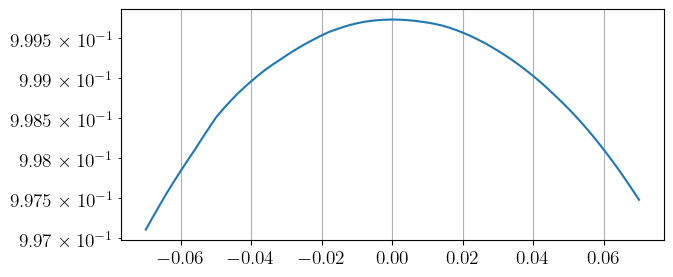

In [297]:
plt.figure(figsize=(7,3))
plt.plot(datas[2]['variations'],datas[2]['avg_fids'])
plt.yticks([0.9,0.99,0.999])
# plt.yticklabels([0.9,0.99,0.999])
plt.yscale('log')
plt.grid()

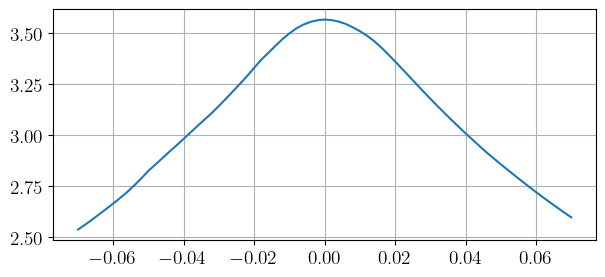

In [291]:
plt.figure(figsize=(7,3))
plt.plot(datas[2]['variations'],NLI(datas[2]['avg_fids']))
# plt.yticks([0.9,0.99,0.999])
# plt.([0.9,0.99,0.999])
# plt.yscale('log')
plt.grid()

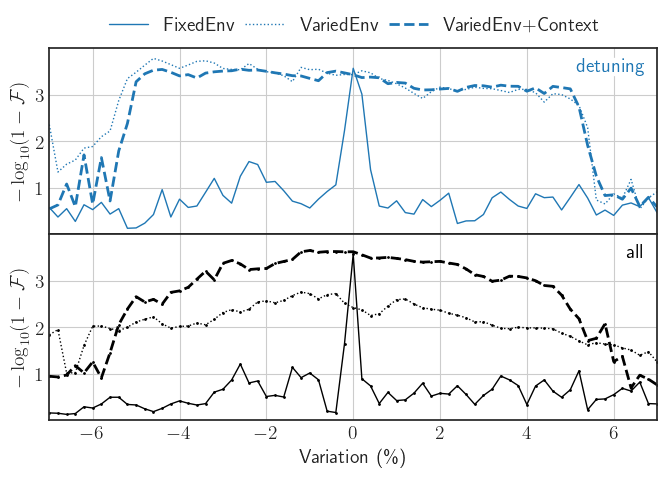

In [123]:
# plt.style.use('seaborn-darkgrid')
# plt.style.use('seaborn-white')

fig, axs = plt.subplots(2,1,figsize=(7,5),sharex=True)

######################################
### LAST TWO PLOTS, GENERALIZED RL ###
######################################

variation = 0.07

param = 'detune0'
datas1 = [
    get_variation_data(3280,5200,variation,param),
    get_variation_data(4658,19400,variation,param),
    # get_variation_data(5360,15200,variation,param),
    # get_variation_data(4658,11800,0.05,'detune0'), # less ep without context
    get_variation_data(9241,11800,variation,param), # unnormalized context
]

param = 'drive_detune_anharm_coupling'
datas2 = [
    get_variation_data(3280,5200,variation,param),
    get_variation_data(1891,400,variation,param),
    get_variation_data(3723,10200,variation,param),
]
titles = ['detuning','all']
cs = ['C0','k']
all_ls  = [['-',':','--'],['o-','o:','o--']]

# textlocs = [[4.5,3.5],[3.5,3.5]]
for j,datas in enumerate([datas1,datas2]):
    
    labels = ['FixedEnv','VariedEnv','VariedEnv+Context']
    # ls  = ['-',':','--']
    ls = all_ls[j]
    alphas = [1,1,1]
    lws = [1,1,2]
    # axs[j].hlines(3,-7,7,'k',linewidth=1.5)
    for i,data in enumerate(datas):
        axs[j].plot(data['variations']*100,NLI(data['avg_fids']),
                    f'{ls[i]}',color=cs[j],label=labels[i], markersize=1,alpha=alphas[i],linewidth=lws[i])
    # axs[j].set_title(titles[j])
    axs[j].text(6.7,3.5, titles[j], color=cs[j], horizontalalignment='right',
                bbox=dict(facecolor='white', edgecolor='white', boxstyle='square,pad=0'))
    axs[j].set_xticks(np.arange(-6,7,2))

axs[-1].set_xlabel('Variation (\%)')
axs[-1].set_xlim(-7,7)
axs[0].legend(bbox_to_anchor=(0.07,0.98), loc='lower left',ncol=3,columnspacing=0.5)
# axs[3].set_title('Generalization capability comparison')

# fig.legend(loc='outside upper center')
for ax in axs:
    ax.set_ylabel('$-\log_{10}(1-\\mathcal{F})$')
    ax.set_ylim(0,4)
    ax.set_yticks(np.arange(1,4,1))
    ax.grid()
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('figs/generalization_capability.pdf',format='pdf')

# Generalization v2

In [3]:
nums = (1+50*np.arange(0.002,0.07+0.002,0.002))*5
print(nums.sum(),nums)

490.0 [ 5.5  6.   6.5  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.
 12.5 13.  13.5 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.
 19.5 20.  20.5 21.  21.5 22.  22.5]


In [2]:
from scipy import stats
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])


../data/*IBMCNOTdirect*1120*variation0.07_detune0.pkl
../data/*IBMCNOTdirect*1120*variation0.07_anharm.pkl
../data/*IBMCNOTdirect*1120*variation0.07_coupling.pkl
../data/*IBMCNOTdirect*1120*variation0.07_drive_avg.pkl
../data/*IBMCNOTdirect*1120*variation0.07_drive_detune_anharm_coupling.pkl


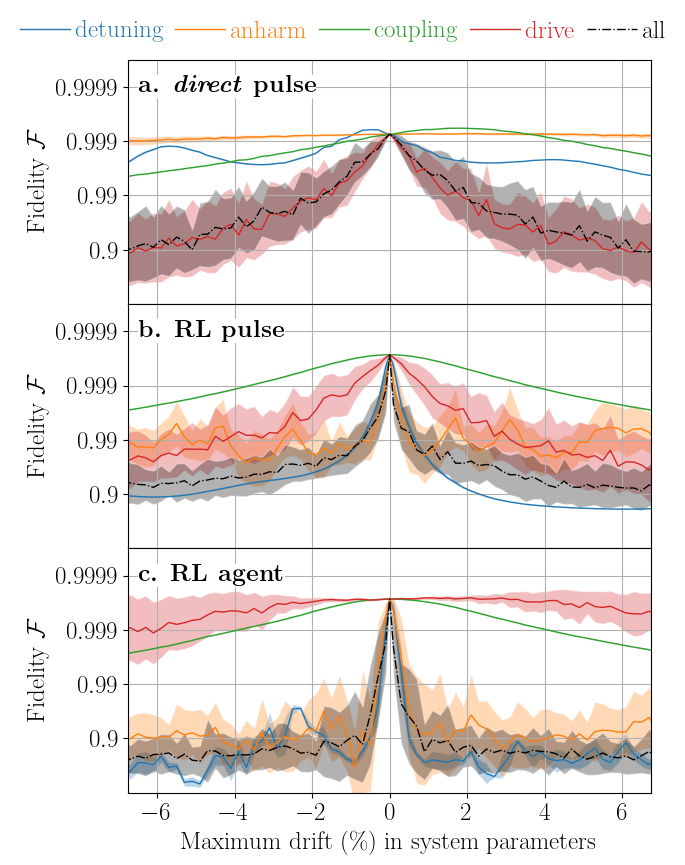

In [5]:
fig, axs = plt.subplots(3,1,figsize=(7,9),sharex=True)
#############################
#### All param variation ####
#############################
datas1 = [
    get_variation_data('IBMCNOTdirect',1120,0.07,'detune0',pulse=True),
    get_variation_data('IBMCNOTdirect',1120,0.07,'anharm',pulse=True),
    get_variation_data('IBMCNOTdirect',1120,0.07,'coupling',pulse=True),
    get_variation_data('IBMCNOTdirect',1120,0.07,'drive_avg',pulse=True),
    get_variation_data('IBMCNOTdirect',1120,0.07,'drive_detune_anharm_coupling',pulse=True),
]
datas2 = [
    get_variation_data(3280,5200,0.07,'detune0',suffix='DataPulse'),
    get_variation_data(3280,5200,0.07,'anharm',suffix='DataPulse'),
    get_variation_data(3280,5200,0.07,'coupling',suffix='DataPulse'),
    get_variation_data(3280,5200,0.07,'drive_avg',suffix='DataPulse'),
    get_variation_data(3280,5200,0.07,'drive_detune_anharm_coupling',suffix='DataPulse'),
]
datas3 = [
    get_variation_data(3280,5200,0.07,'detune0',suffix='Data'),
    get_variation_data(3280,5200,0.07,'anharm',suffix='Data'),
    get_variation_data(3280,5200,0.07,'coupling',suffix='Data'),
    get_variation_data(3280,5200,0.07,'drive_avg',suffix='Data'),
    get_variation_data(3280,5200,0.07,'drive_detune_anharm_coupling',suffix='Data'),
]

labels = ['detuning','anharm','coupling','drive','all']
ls = ['']*4 + ['-.']
cs = ['C0','C1','C2','C3','k']
lws = [1]*5
texts = [r'\textbf{a. \textit{direct} pulse}',r'\textbf{b. RL pulse}',r'\textbf{c. RL agent}']

# bin_edges = np.hstack([np.arange(-0.07,-0.004,0.005),[-1e-7,1e-7],np.arange(0.005,0.074,0.005)])*100
bin_edges = np.hstack([np.arange(-0.07,-0.001,0.002),[-1e-7,1e-7],np.arange(0.002,0.072,0.002)])*100
bin_centers = (bin_edges[1:] + bin_edges[:-1])/2

for j,datas in enumerate([datas1,datas2,datas3]):
    for i,data in enumerate(datas):
        bin_means, _, binnumber = stats.binned_statistic(data['max_variations']*100, NLI(data['avg_fids']), 
                                                             statistic='mean', bins=bin_edges)
        bin_stds, _ , binnumber = stats.binned_statistic(data['max_variations']*100, NLI(data['avg_fids']), 
                                                                statistic='std', bins=bin_edges)
        axs[j].plot(bin_centers,bin_means,f'{ls[i]}',color=cs[i],
                    label=labels[i],linewidth=lws[i],markersize=2)
        axs[j].fill_between(bin_centers,bin_means-bin_stds,bin_means+bin_stds, #hatch=hatchs[i],
                     color=cs[i],alpha=0.3,edgecolor='white')
    axs[j].text(-6.5,3.9, texts[j], color='black', horizontalalignment='left',
            bbox=dict(facecolor='white', edgecolor='white', boxstyle='square,pad=0'))

# axs[0].legend(bbox_to_anchor=(-0.01,0.98), loc='lower left',handletextpad=0.7,
#               ncol=3,columnspacing=1,labelcolor='linecolor',edgecolor='white')
axs[0].legend(bbox_to_anchor=(-0.25,0.98), loc='lower left',handletextpad=0.2,
              ncol=5,columnspacing=0.5,labelcolor='linecolor',edgecolor='white')
    
axs[-1].set_xlabel('Maximum drift (\%) in system parameters')
axs[-1].set_xlim(-6.75,6.75)
axs[-1].set_xticks(np.arange(-6,7,2))

for ax in axs:
    # ax.set_ylabel('$-\log_{10}(1-\\mathcal{F})$')
    ax.set_ylabel('Fidelity $\\mathcal{F}$')
    ax.set_ylim(0,4.5)
    ax.set_yticks(np.arange(1,5,1))
    ax.set_yticklabels(['$0.9$','$0.99$','$0.999$','$0.9999$'])
    ax.grid()
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('figs/generalization_fixedparam.pdf',format='pdf',bbox_inches='tight')

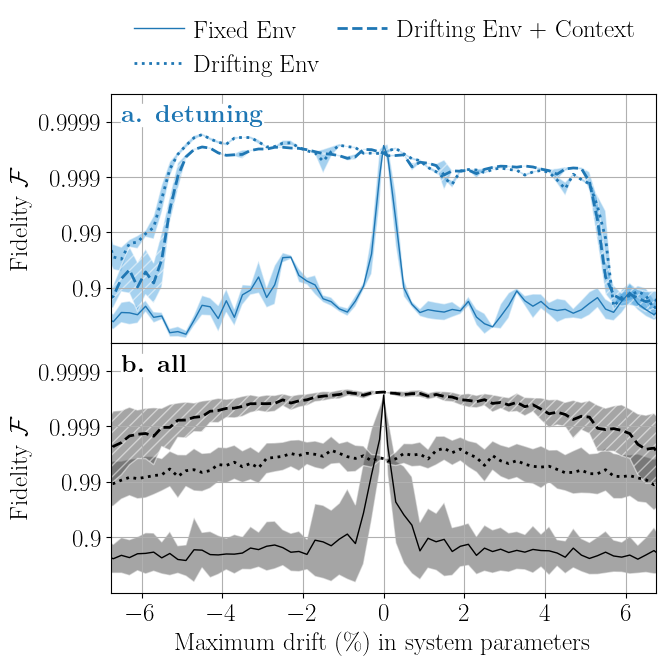

In [16]:
# plt.style.use('seaborn-darkgrid')
# plt.style.use('seaborn-white')

fig, axs = plt.subplots(2,1,figsize=(7,7),sharex=True)

######################################
### LAST TWO PLOTS, GENERALIZED RL ###
######################################

variation = 0.07

param = 'detune0'
datas1 = [
    get_variation_data(3280,5200,variation,param,suffix='Data'),
    get_variation_data(4658,19400,variation,param,suffix='Data'),
    # get_variation_data(5360,15200,variation,param),
    # get_variation_data(4658,11800,0.05,'detune0'), # less ep without context
    get_variation_data(9241,11800,variation,param,suffix='Data'), # unnormalized context
]

param = 'drive_detune_anharm_coupling'
datas2 = [
    get_variation_data(3280,5200,variation,param,suffix='Data'),
    get_variation_data(1891,400,variation,param,suffix='Data'),
    get_variation_data(3723,10200,variation,param,suffix='Data'),
]
titles = [r'\textbf{a. detuning}',r'\textbf{b. all}']
cs = ['C0','k']
all_ls  = [['-',':','--'],['-',':','--']]
hatchs = ['','','///']
# textlocs = [[4.5,3.5],[3.5,3.5]]

# bin_edges = np.hstack([np.arange(-0.07,-0.004,0.005),[-1e-7,1e-7],np.arange(0.005,0.074,0.005)])*100
bin_edges = np.hstack([np.arange(-0.07,-0.001,0.002),[-1e-7,1e-7],np.arange(0.002,0.072,0.002)])*100
bin_centers = (bin_edges[1:] + bin_edges[:-1])/2
    
    
for j,datas in enumerate([datas1,datas2]):
    
    labels = ['Fixed Env','Drifting Env','Drifting Env + Context']
    # labels = ['Fixed Env','Drifting Env + Context','Drifting Env']
    ls = all_ls[j]
    alphas = [1,1,1]
    lws = [1,2,2]
    for i,data in enumerate(datas):
        bin_counts, _, binnumber = stats.binned_statistic(data['max_variations']*100, NLI(data['avg_fids']), 
                                                             statistic='count', bins=bin_edges)
        bin_means, _, binnumber = stats.binned_statistic(data['max_variations']*100, NLI(data['avg_fids']), 
                                                             statistic='mean', bins=bin_edges)
        bin_stds, _ , binnumber = stats.binned_statistic(data['max_variations']*100, NLI(data['avg_fids']), 
                                                                statistic='std', bins=bin_edges)
    
        # axs[j].plot(data['max_variations']*100,NLI(data['avg_fids']),
        #             f'{cs[j]}*',label=labels[i], markersize=4,alpha=0.1)
        axs[j].plot(bin_centers,bin_means,f'{ls[i]}',color=cs[j],alpha=alphas[i],
                    label=labels[i],linewidth=lws[i],markersize=2)
        axs[j].fill_between(bin_centers,bin_means-bin_stds,bin_means+bin_stds,hatch=hatchs[i],
                     color=lighten_color(cs[j],0.7),alpha=0.5,
                            edgecolor='white')
                            # edgecolor=lighten_color(cs[j],0.9)
        # axs[j].plot(data['variations']*100,NLI(data['avg_fids']),
        #             f'{ls[i]}',color=cs[j],label=labels[i], markersize=1,alpha=alphas[i],linewidth=lws[i])
        
    axs[j].text(-6.5,4, titles[j], color=cs[j], horizontalalignment='left',
                bbox=dict(facecolor='white', edgecolor='white', boxstyle='square,pad=0'))
    axs[j].set_xticks(np.arange(-6,7,2))
    

# axs[0].text(-6.3,4.1, r'\textbf{a}', horizontalalignment='right',
#             bbox=dict(facecolor='white', edgecolor='white', boxstyle='square,pad=0'))
# axs[1].text(-6.3,4.1, r'\textbf{b}', horizontalalignment='right',
#             bbox=dict(facecolor='white', edgecolor='white', boxstyle='square,pad=0'))
axs[-1].set_xlabel('Maximum drift (\%) in system parameters')
axs[-1].set_xlim(-6.75,6.75)
axs[0].legend(bbox_to_anchor=(0,0.98), loc='lower left',ncol=2,columnspacing=0.7,
              edgecolor='white',handletextpad=0.4)
# axs[3].set_title('Generalization capability comparison')

# fig.legend(loc='outside upper center')
for ax in axs:
    # ax.set_ylabel('$-\log_{10}(1-\\mathcal{F})$')
    ax.set_ylabel('Fidelity $\\mathcal{F}$')
    ax.set_ylim(0,4.5)
    ax.set_yticks(np.arange(1,5,1))
    ax.set_yticklabels(['$0.9$','$0.99$','$0.999$','$0.9999$'])
    ax.grid()
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('figs/generalization_capability.pdf',format='pdf',bbox_inches='tight')

In [7]:
datas2[-1].keys()

dict_keys(['histograms', 'max_variations', 'avg_fids'])

In [10]:
datas2[-1]['avg_fids'].min()

0.8362367352119253

In [52]:
ind = datas2[-1]['avg_fids'][abs(datas2[-1]['max_variations'])<0.06].argmin()
datas2[-1]['avg_fids'][ind]

0.9537137243290006

In [57]:
datas2[-1]['avg_fids'][abs(datas2[-1]['max_variations'])<0.0001].min()

0.9997598703978193

In [59]:
NLI(0.9997598703978193)

3.619554298621588

In [72]:
data = get_variation_data(3723,10200,variation,param,suffix='Data')

(2923,)

In [75]:
ind = data['avg_fids'][abs(data['max_variations'])<0.06].argmin()
# ind = np.random.randint(2923)
d = data['histograms']
variations = {}
for key in d.keys():
    variations[key] = d[key][ind]
pickle.dump(variations, open('../data/valencia10_drift_1.pkl', 'wb') )
print(data['avg_fids'][ind],NLI(data['avg_fids'][ind]))
variations

0.9537137243290006 1.3345477624145234


{'drive': array([-0.00722279,  0.02263578, -0.0283148 , -0.02048592]),
 'detune': array([-0.05684035,  0.05331411]),
 'anharm': array([-0.04396466,  0.05445264]),
 'coupling': array([0.04959622]),
 'freq': array([0.0398136, 0.0407063])}

In [48]:
!ls ../data/*valencia*

../data/hamiltonian_vars_valencia.json
../data/hamiltonian_vars_valencia_all1.015.json
../data/hamiltonian_vars_valencia_anharm1.015.json
../data/hamiltonian_vars_valencia_freq1.015.json
../data/valencia_variations1.pkl


In [50]:
variations

{'drive': array([-0.00722279,  0.02263578, -0.0283148 , -0.02048592]),
 'detune': array([-0.05684035,  0.05331411]),
 'anharm': array([-0.04396466,  0.05445264]),
 'coupling': array([0.04959622]),
 'freq': array([0.0398136, 0.0407063])}

In [39]:
d[key][ind]

array([-0.00722279,  0.02263578, -0.0283148 , -0.02048592])

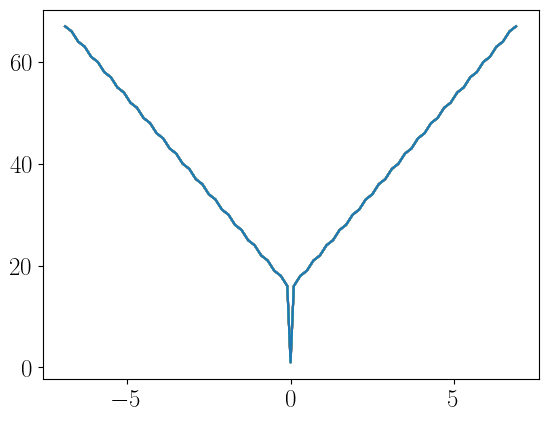

In [23]:
for i,data in enumerate(datas1+datas2+datas3):
    bin_counts, _, binnumber = stats.binned_statistic(data['max_variations']*100, NLI(data['avg_fids']), 
                                                         statistic='count', bins=bin_edges)
    bin_means, _, binnumber = stats.binned_statistic(data['max_variations']*100, NLI(data['avg_fids']), 
                                                         statistic='mean', bins=bin_edges)
    bin_stds, _ , binnumber = stats.binned_statistic(data['max_variations']*100, NLI(data['avg_fids']), 
                                                            statistic='std', bins=bin_edges)
    plt.plot(bin_centers,bin_counts)
    # plt.plot(bin_centers,bin_means)
plt.show()

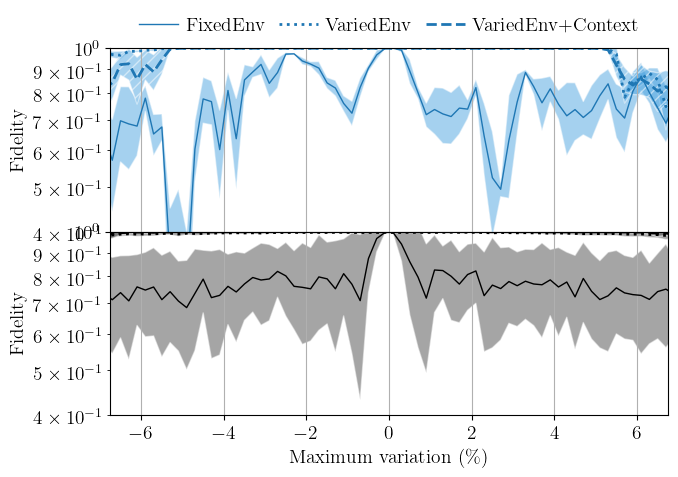

In [317]:
# plt.style.use('seaborn-darkgrid')
# plt.style.use('seaborn-white')

fig, axs = plt.subplots(2,1,figsize=(7,5),sharex=True)

######################################
### LAST TWO PLOTS, GENERALIZED RL ###
######################################

variation = 0.07

param = 'detune0'
datas1 = [
    get_variation_data(3280,5200,variation,param,suffix='Data'),
    get_variation_data(4658,19400,variation,param,suffix='Data'),
    # get_variation_data(5360,15200,variation,param),
    # get_variation_data(4658,11800,0.05,'detune0'), # less ep without context
    get_variation_data(9241,11800,variation,param,suffix='Data'), # unnormalized context
]

param = 'drive_detune_anharm_coupling'
datas2 = [
    get_variation_data(3280,5200,variation,param,suffix='Data'),
    get_variation_data(1891,400,variation,param,suffix='Data'),
    get_variation_data(3723,10200,variation,param,suffix='Data'),
]
titles = [r'\textbf{a. detuning}',r'\textbf{b. all}']
cs = ['C0','k']
all_ls  = [['-',':','--'],['-',':','--']]
hatchs = ['','','///']
# textlocs = [[4.5,3.5],[3.5,3.5]]

# bin_edges = np.hstack([np.arange(-0.07,-0.004,0.005),[-1e-7,1e-7],np.arange(0.005,0.074,0.005)])*100
bin_edges = np.hstack([np.arange(-0.07,-0.001,0.002),[-1e-7,1e-7],np.arange(0.002,0.072,0.002)])*100
bin_centers = (bin_edges[1:] + bin_edges[:-1])/2
    
    
for j,datas in enumerate([datas1,datas2]):
    
    labels = ['FixedEnv','VariedEnv','VariedEnv+Context']
    ls = all_ls[j]
    alphas = [1,1,1]
    lws = [1,2,2]
    for i,data in enumerate(datas):
        bin_means, _, binnumber = stats.binned_statistic(data['max_variations']*100, data['avg_fids'], 
                                                             statistic='mean', bins=bin_edges)
        bin_stds, _ , binnumber = stats.binned_statistic(data['max_variations']*100, data['avg_fids'], 
                                                                statistic='std', bins=bin_edges)
    
        # axs[j].plot(data['max_variations']*100,NLI(data['avg_fids']),
        #             f'{cs[j]}*',label=labels[i], markersize=4,alpha=0.1)
        axs[j].plot(bin_centers,bin_means,f'{ls[i]}',color=cs[j],alpha=alphas[i],
                    label=labels[i],linewidth=lws[i],markersize=2)
        axs[j].fill_between(bin_centers,bin_means-bin_stds,bin_means+bin_stds,hatch=hatchs[i],
                     color=lighten_color(cs[j],0.7),alpha=0.5,
                            edgecolor='white')
                            # edgecolor=lighten_color(cs[j],0.9)
        # axs[j].plot(data['variations']*100,NLI(data['avg_fids']),
        #             f'{ls[i]}',color=cs[j],label=labels[i], markersize=1,alpha=alphas[i],linewidth=lws[i])
        
    # axs[j].text(-6.5,4, titles[j], color=cs[j], horizontalalignment='left',
    #             bbox=dict(facecolor='white', edgecolor='white', boxstyle='square,pad=0'))
    axs[j].set_xticks(np.arange(-6,7,2))
    

# axs[0].text(-6.3,4.1, r'\textbf{a}', horizontalalignment='right',
#             bbox=dict(facecolor='white', edgecolor='white', boxstyle='square,pad=0'))
# axs[1].text(-6.3,4.1, r'\textbf{b}', horizontalalignment='right',
#             bbox=dict(facecolor='white', edgecolor='white', boxstyle='square,pad=0'))
axs[-1].set_xlabel('Maximum variation (\%)')
axs[-1].set_xlim(-6.75,6.75)
axs[0].legend(bbox_to_anchor=(0.02,0.98), loc='lower left',ncol=3,columnspacing=0.7,
              edgecolor='white',handletextpad=0.4)
# axs[3].set_title('Generalization capability comparison')

# fig.legend(loc='outside upper center')
for ax in axs:
    # ax.set_ylabel('$-\log_{10}(1-\\mathcal{F})$')
    ax.set_ylabel('Fidelity')
    ax.set_ylim(0.4,1)
    ax.set_yscale('log')
    # ax.set_yticks([0.9,0.99,0.999,0.9999])
    # ax.set_yticklabels(['$0.9$','$0.99$','$0.999$','$0.9999$'])
    ax.grid()
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
# plt.savefig('figs/generalization_capability.pdf',format='pdf')

In [315]:
bin_means.max()

0.9997598703978193

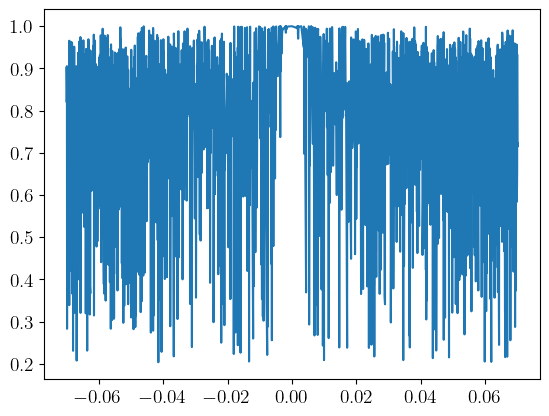

In [274]:
x = datas[0]['max_variations']
y = datas[0]['avg_fids']
y = y[np.argsort(x)]
x = np.sort(x)
plt.plot(x,y)

In [114]:
np.arange(-0.07,-0.004,0.002)

array([-0.07 , -0.068, -0.066, -0.064, -0.062, -0.06 , -0.058, -0.056,
       -0.054, -0.052, -0.05 , -0.048, -0.046, -0.044, -0.042, -0.04 ,
       -0.038, -0.036, -0.034, -0.032, -0.03 , -0.028, -0.026, -0.024,
       -0.022, -0.02 , -0.018, -0.016, -0.014, -0.012, -0.01 , -0.008,
       -0.006])

In [120]:
# bin_edges = np.hstack([np.arange(-0.07,-0.004,0.005),[-1e-7,1e-7],np.arange(0.005,0.074,0.005)])*100
bin_edges.round(2)

array([-7. , -6.8, -6.6, -6.4, -6.2, -6. , -5.8, -5.6, -5.4, -5.2, -5. ,
       -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. , -2.8,
       -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6,
       -0.4, -0.2, -0. ,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,
        1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,
        3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,
        6. ,  6.2,  6.4,  6.6,  6.8,  7. ])

# Robustness

In [17]:
# names = ['ZXp90_direct','ZXp90_echoed','2520_4000','7695_4200']
names = ['ZXp90_direct',
         '2520_4000_1120dt_r', 
         '2520_4000_1120dt_agent',
         '3992_2400_1120dt_28seg_r',
         '3992_2400_1120dt_28seg_agent',
         # '7695_4200',
        ]
datas = []
for name in names:
    file = glob.glob(f'../data/*{name}*_allparams_range0.03.npy')
    print(file)
    if len(file) != 1:
        raise ValueError
    datas.append(np.load(file[0]))

['../data/IBM_ZXp90_direct_1120dt_robustness_allparams_range0.03.npy']
['../data/ZXp90_2520_4000_1120dt_robustness_allparams_range0.03.npy']
['../data/ZXp90_2520_4000_1120dt_agentrobustness_allparams_range0.03.npy']
['../data/ZXp90_3992_2400_1120dt_28seg_robustness_allparams_range0.03.npy']
['../data/ZXp90_3992_2400_1120dt_28seg_agentrobustness_allparams_range0.03.npy']


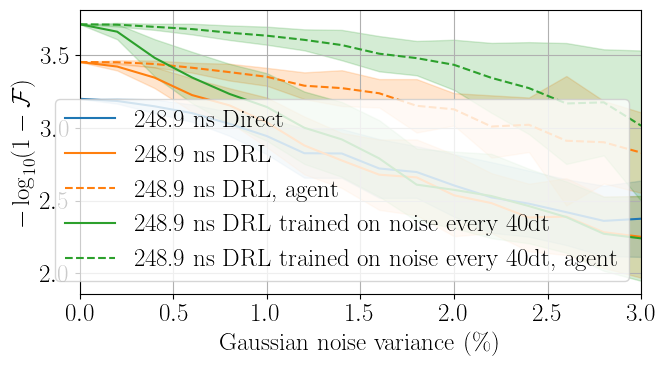

In [7]:
ctrl_noises = np.arange(0,3.2,0.2)
plt.figure(figsize=(7,4))
labels = ['248.9 ns Direct', 
          '248.9 ns DRL', 
          '248.9 ns DRL, agent',
          '248.9 ns DRL trained on noise every 40dt',
          '248.9 ns DRL trained on noise every 40dt, agent',
          '177.8 ns DRL'
         ]
cs = [0,1,1,2,2]
ls = ['','','--','','--']
for i,data in enumerate(datas):
    mean, std = NLI(data).mean(1), NLI(data).std(1)
    plt.plot(ctrl_noises,mean,ls[i],color=f'C{cs[i]}',label=labels[i])
    plt.fill_between(ctrl_noises,mean-std,mean+std,color=f'C{cs[i]}',alpha=0.2)

plt.ylabel('$-\\log_{10}(1-\\mathcal{F})$')
plt.xlabel('Gaussian noise variance (\%)')
plt.xlim(0,3)
plt.legend()
plt.grid()
plt.tight_layout()
# plt.savefig('figs/robustness_pulse_gaussiannoise.pdf',format='pdf')

In [18]:
names = ['ZXp90_direct','2520_4000_1120dt_r','7695_4200']

datas = []
for name in names:
    file = glob.glob(f'../data/*{name}*_allparams_range0.03.npy')
    print(file)
    if len(file) != 1:
        raise ValueError
    datas.append(np.load(file[0]))

['../data/IBM_ZXp90_direct_1120dt_robustness_allparams_range0.03.npy']
['../data/ZXp90_2520_4000_1120dt_robustness_allparams_range0.03.npy']
['../data/ZXp90_7695_4200_800dt_robustness_allparams_range0.03.npy']


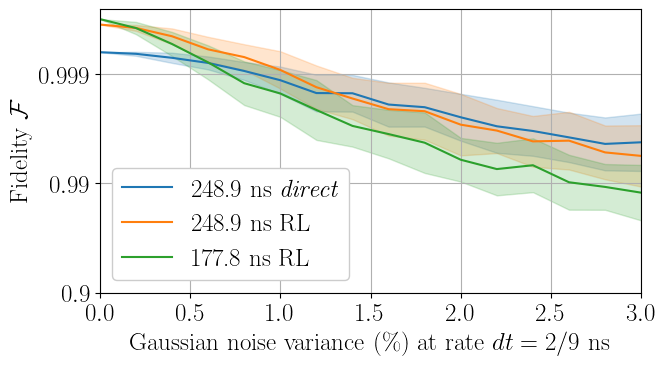

In [22]:
ctrl_noises = np.arange(0,3.2,0.2)
plt.figure(figsize=(7,4))
labels = ['248.9 ns \\textit{direct}', 
          '248.9 ns RL', 
          '177.8 ns RL'
         ]
cs = [0,1,2]
ls = ['','','']
for i,data in enumerate(datas):
    mean, std = NLI(data).mean(1), NLI(data).std(1)
    plt.plot(ctrl_noises,mean,ls[i],color=f'C{cs[i]}',label=labels[i])
    plt.fill_between(ctrl_noises,mean-std,mean+std,color=f'C{cs[i]}',alpha=0.2)

plt.ylabel('Fidelity $\\mathcal{F}$')
plt.xlabel('Gaussian noise variance (\%) at rate $dt=2/9$ ns')
plt.xlim(0,3)
plt.yticks([1,2,3],['$0.9$','$0.99$','$0.999$'])
plt.legend(loc='lower left',framealpha=1)
plt.grid()
plt.tight_layout()
plt.savefig('figs/robustness_pulse_gaussiannoise.pdf',format='pdf',bbox_inches='tight')

In [ ]:
np